In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

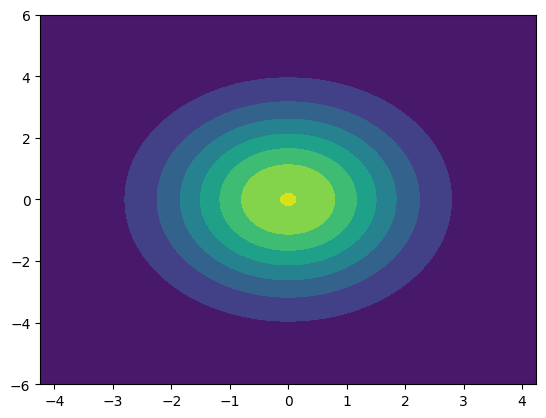

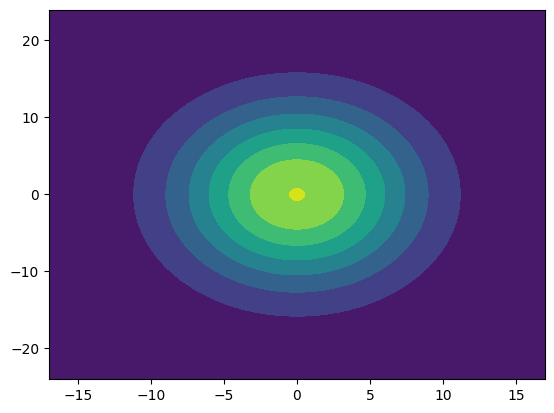

In [17]:
import numpy as np
import pdb
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal


def gauss2d(mu, sigma, to_plot=False):
    w, h = 100, 100

    std = [np.sqrt(sigma[0]), np.sqrt(sigma[1])]
    x = np.linspace(mu[0] - 3 * std[0], mu[0] + 3 * std[0], w)
    y = np.linspace(mu[1] - 3 * std[1], mu[1] + 3 * std[1], h)

    x, y = np.meshgrid(x, y)

    x_ = x.flatten()
    y_ = y.flatten()
    xy = np.vstack((x_, y_)).T

    normal_rv = multivariate_normal(mu, sigma)
    z = normal_rv.pdf(xy)
    z = z.reshape(w, h, order='F')

    if to_plot:
        plt.contourf(x, y, z.T)
        plt.show()

    return z


MU = np.array([0, 0])
SIGMA = np.array([2, 4])
z = gauss2d(MU, SIGMA, True)
z = gauss2d(MU, 16*SIGMA, True)

In [ ]:
from adbench.myutils import Utils
from adbench.run import RunPipeline
from adbench.baseline.Bagging.run import Bagging
from adbench.baseline.AADOCAE.run import AADOCAE
from adbench.baseline.RP_IForest.run import RP_IForest

In [ ]:
# customized model on customized dataset
utils = Utils()
pipeline = RunPipeline(suffix='ADBench', parallel='unsupervise', realistic_synthetic_mode=None, noise_type=None, num_seed=1)
dataset = {}
dataset['X'] = np.random.randn(1000, 20)
dataset['y'] = np.random.choice([0, 1], 1000)
#print(dataset['y'])
RunPipeline(suffix='ADBench', parallel='unsupervise', realistic_synthetic_mode=None, noise_type=None, num_seed=1)
results = pipeline.run(dataset=dataset, clf=AADOCAE)

In [ ]:
model_to_test = RP_IForest
for mode in [

                None,

            ]:
    pipeline = RunPipeline(suffix=model_to_test.name, parallel='unsupervise', realistic_synthetic_mode=mode, noise_type=None, num_seed=3)
    # 'duplicated_anomalies', 'irrelevant_features' and 'label_contamination'
    results = pipeline.run(clf=model_to_test)

In [20]:
a = [np.random.rand(10) for _ in range(3)]
np.stack(a, axis=-1).mean(axis=-1).shape

(10,)

In [ ]:
import torch
arr=[]
a = torch.rand((5, 2))
b = torch.rand((5, 2))
print(a)
print(b)
for _ in range(1):
    arr.append(a)
    arr.append(b)

arr = torch.concat(arr, dim=-1)
print(arr)
print(torch.nn.Softmax(dim=0)(arr.sum(dim=-1, keepdim=True)))
#arr = arr.reshape(-1, arr.shape[-1]*arr.shape[-2])
#print(arr)
#arr.shape
#torch.cuda.is_available()
#1.24.3

In [13]:
import os
import numpy as np
from adbench.baseline.PEAE.run import PEAE

In [10]:
time_series_directory = os.path.normpath('../ADBench/adbench/datasets/TS')
fname = 'normal_constant_1770.csv'
X = np.loadtxt(os.path.join(time_series_directory, fname), dtype='float', delimiter=' ')

In [11]:
X.shape

(520000, 17)

In [24]:
model = PEAE()
model.fit(X_train=X, y_train=X)

ANN normalization layer:  BatchNorm1d
Getting PE...
First 10 entries of PE:  tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.6969e-01,  8.0196e-01,  ...,  1.0000e+00,
          1.0746e-08,  1.0000e+00],
        [ 9.0930e-01, -3.5090e-01,  9.5814e-01,  ...,  1.0000e+00,
          2.1492e-08,  1.0000e+00],
        ...,
        [ 6.5699e-01,  8.9182e-01,  2.2877e-01,  ...,  1.0000e+00,
          7.5223e-08,  1.0000e+00],
        [ 9.8936e-01,  1.3626e-01,  9.1736e-01,  ...,  1.0000e+00,
          8.5969e-08,  1.0000e+00],
        [ 4.1212e-01, -7.3656e-01,  8.6724e-01,  ...,  1.0000e+00,
          9.6715e-08,  1.0000e+00]], device='cuda:0')
PE generated successfully.
epoch : 1/5000, loss = 5610.358446
epoch : 500/5000, loss = 1415.914439
epoch : 1000/5000, loss = 1415.909769
epoch : 1500/5000, loss = 1415.911599
epoch : 2000/5000, loss = 1415.907512
epoch : 2500/5000, loss = 1415.906544
epoch : 3000/5000, loss

In [6]:
score = model.predict_score(X[:10000])

self.error_mu=1131.3755, self.error_std=6.8207


[]

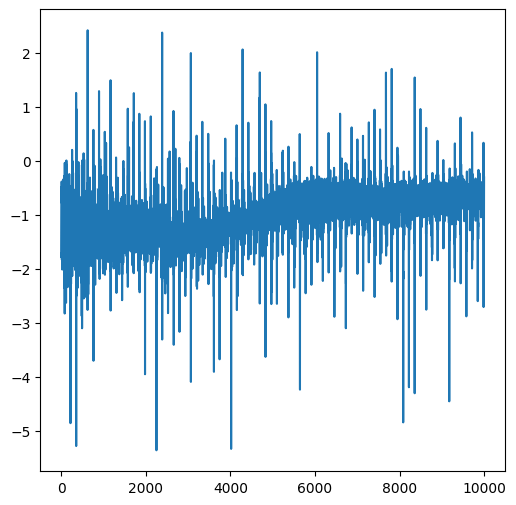

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.plot(score)
plt.plot()

In [ ]:
score

array([[-0.4156548 ],
       [-0.4156558 ],
       [-0.41566002],
       [-0.41565958],
       [-0.41565603],
       [-0.4156508 ],
       [-0.4156452 ],
       [-0.41564187],
       [-0.41564226],
       [-0.41564387],
       [-0.41564474],
       [-0.41565064],
       [-0.4156468 ],
       [-0.41565186],
       [-0.41565412],
       [-0.41565165],
       [-0.4156438 ],
       [-0.41563383],
       [-0.41564026],
       [-0.41564587],
       [-0.41564187],
       [-0.41564566],
       [-0.4156435 ],
       [-0.41564402],
       [-0.4156391 ],
       [-0.4156392 ],
       [-0.41563958],
       [-0.41563526],
       [-0.41563675],
       [-0.41564327],
       [-0.41564095],
       [-0.41564748],
       [-0.41564965],
       [-0.41565064],
       [-0.41564628],
       [-0.4156478 ],
       [-0.4156445 ],
       [-0.41564655],
       [-0.4156475 ],
       [-0.41564348],
       [-0.41564542],
       [-0.41564304],
       [-0.41564044],
       [-0.41563597],
       [-0.41564426],
       [-0